## Death rate by countries and its cause, EDA



### 1. Importing libreries 

### 2. Cleaning Data

### 3. Data wrangling

### 4. Exploring relationships

### 5. Cluster analysis

### 6. Linear regression on data

### 7.Visualizatons




#### Importing libreries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [63]:
# Load the dataset
# Define the path to the data files
path = r'/Users/milivanili/Desktop/CF Document 6'

df = pd.read_csv(os.path.join(path,'01 Data','Prepared Data','df_cause_2.csv'))

In [64]:
#Checking output
df.head()

Unnamed: 0      Country Country Code  Year  Outdoor air pollution  \
0           0  Afghanistan          AFG  1990              29.631234   
1           1  Afghanistan          AFG  1991              29.985574   
2           2  Afghanistan          AFG  1992              28.156905   
3           3  Afghanistan          AFG  1993              25.871623   
4           4  Afghanistan          AFG  1994              24.508987   

   High systolic blood pressure  Diet high in sodium  \
0                    239.677316             9.771107   
1                    240.778017             9.818368   
2                    218.197356             8.915662   
3                    192.526864             7.876456   
4                    178.951840             7.337168   

   Diet low in whole grains  Alcohol use  Diet low in fruits  ...  \
0                 66.172370     3.328722           29.780839  ...   
1                 66.532237     3.387569           30.227543  ...   
2                 60.518686     3.118408           27.791985  ...   
3                 53.549904     2.777825           24.850469  ...   
4                 49.807335     2.581596           23.357298  ...   

   Non-exclusive breastfeeding  Iron deficiency  Continents  Decade  \
0                    20.720358         5.273593        Asia     90s   
1                    23.275581         5.686277        Asia     90s   
2                    25.320481         5.805547        Asia     90s   
3                    26.607140         5.519946        Asia     90s   
4                    24.800145         5.253774        Asia     90s   

   Population  IncomeGroup  Life Expectancy  Female Population  \
0  10694796.0   Low income           45.967          5346409.0   
1  10745167.0   Low income           46.663          5372208.0   
2  12057433.0   Low income           47.596          6028939.0   
3  14003760.0   Low income           51.466          7000119.0   
4  15455555.0   Low income           51.495          7722096.0   

   Male Population  Cluster  
0        5348387.0        3  
1        5372959.0        3  
2        6028494.0        3  
3        7003641.0        3  
4        7733458.0        3  

[5 rows x 40 columns]

In [65]:
# Dropping non numerical columns exept Country 
df_cleaned=df.drop(columns=['Unnamed: 0','Unnamed: 0','Cluster'])

In [66]:
df_cleaned.head()

Country Country Code  Year  Outdoor air pollution  \
0  Afghanistan          AFG  1990              29.631234   
1  Afghanistan          AFG  1991              29.985574   
2  Afghanistan          AFG  1992              28.156905   
3  Afghanistan          AFG  1993              25.871623   
4  Afghanistan          AFG  1994              24.508987   

   High systolic blood pressure  Diet high in sodium  \
0                    239.677316             9.771107   
1                    240.778017             9.818368   
2                    218.197356             8.915662   
3                    192.526864             7.876456   
4                    178.951840             7.337168   

   Diet low in whole grains  Alcohol use  Diet low in fruits  \
0                 66.172370     3.328722           29.780839   
1                 66.532237     3.387569           30.227543   
2                 60.518686     3.118408           27.791985   
3                 53.549904     2.777825           24.850469   
4                 49.807335     2.581596           23.357298   

   Unsafe water source  ...  Discontinued breastfeeding  \
0            34.614966  ...                    1.000487   
1            40.101750  ...                    1.126088   
2            44.420732  ...                    1.244046   
3            51.071998  ...                    1.456752   
4            46.533431  ...                    1.319914   

   Non-exclusive breastfeeding  Iron deficiency  Continents  Decade  \
0                    20.720358         5.273593        Asia     90s   
1                    23.275581         5.686277        Asia     90s   
2                    25.320481         5.805547        Asia     90s   
3                    26.607140         5.519946        Asia     90s   
4                    24.800145         5.253774        Asia     90s   

   Population  IncomeGroup  Life Expectancy  Female Population  \
0  10694796.0   Low income           45.967          5346409.0   
1  10745167.0   Low income           46.663          5372208.0   
2  12057433.0   Low income           47.596          6028939.0   
3  14003760.0   Low income           51.466          7000119.0   
4  15455555.0   Low income           51.495          7722096.0   

   Male Population  
0        5348387.0  
1        5372959.0  
2        6028494.0  
3        7003641.0  
4        7733458.0  

[5 rows x 38 columns]

In [67]:
df_cleaned.describe()

Year  Outdoor air pollution  High systolic blood pressure  \
count  6120.000000            6120.000000                   6120.000000   
mean   2004.500000              36.345783                    145.206555   
std       8.656149              29.499256                    108.756806   
min    1990.000000               0.000000                      0.032689   
25%    1997.000000              16.256999                     74.454044   
50%    2004.500000              28.045680                    114.526861   
75%    2012.000000              46.107842                    173.062882   
max    2019.000000             198.211115                    676.757704   

       Diet high in sodium  Diet low in whole grains  Alcohol use  \
count          6120.000000               6120.000000  6120.000000   
mean             21.074801                 28.117750    33.972332   
std              29.009530                 25.127071    29.099850   
min               0.000000                  0.000000     0.000000   
25%               6.701985                  9.796841    13.109814   
50%              12.129067                 20.620414    29.627878   
75%              21.922213                 36.696245    44.200686   
max             233.672294                159.740424   215.694369   

       Diet low in fruits  Unsafe water source  Secondhand smoke  \
count         6120.000000          6120.000000       6120.000000   
mean            12.827200            27.521490         16.245290   
std             10.147122            49.752503         11.291644   
min              0.000000             0.000000          0.016345   
25%              6.238643             0.205550          8.146728   
50%             10.116635             3.022671         12.790265   
75%             16.265139            33.319783         21.008890   
max             62.725598           377.091475         82.213400   

       Low birth weight  ...  Low bone mineral density  Vitamin A deficiency  \
count       6120.000000  ...               6120.000000           6120.000000   
mean          36.441842  ...                  4.105735              2.530314   
std           42.887592  ...                  3.139284              6.680741   
min            0.000000  ...                  0.000000              0.000000   
25%            4.394157  ...                  2.236340              0.000000   
50%           17.348345  ...                  3.194158              0.013349   
75%           53.714145  ...                  4.783549              1.202747   
max          235.471646  ...                 44.709389             67.473868   

       Child stunted growt  Discontinued breastfeeding  \
count          6120.000000                 6120.000000   
mean              8.451078                    0.374470   
std              17.590707                    0.729171   
min               0.000000                    0.000000   
25%               0.005036                    0.000000   
50%               0.504043                    0.024685   
75%               7.556618                    0.430773   
max             173.582738                    6.666151   

       Non-exclusive breastfeeding  Iron deficiency    Population  \
count                  6120.000000      6120.000000  6.120000e+03   
mean                      5.915154         1.004383  3.191026e+07   
std                      10.779331         1.616581  1.247921e+08   
min                       0.000000         0.000000  9.182000e+03   
25%                       0.042514         0.006563  1.327345e+06   
50%                       0.809111         0.150647  6.118224e+06   
75%                       6.597108         1.409211  2.017983e+07   
max                      81.534906         9.057061  1.407745e+09   

       Life Expectancy  Female Population  Male Population  
count      6120.000000       6.120000e+03     6.120000e+03  
mean         68.252773       1.586485e+07     1.604494e+07  
std           9.347366       6.086442e+07     6.394116

In [68]:
# Summarize the data to find the top causes of death
non_cause_columns = ['Country', 'Country Code', 'Year', 'Continents', 'Decade', 'Population', 'IncomeGroup', 'Life Expectancy', 'Female Population', 'Male Population', 'Total Deaths']
cause_columns = [col for col in df_cleaned.columns if col not in non_cause_columns]

# Sum the values for each cause of death across all rows
total_deaths_by_cause = df_cleaned[cause_columns].sum().sort_values(ascending=False)

# Display top causes
top_causes = total_deaths_by_cause.head(10)
print("Top Causes of Death:\n", top_causes)


Top Causes of Death:
 High systolic blood pressure                888664.118006
Smoking                                     567322.064667
High fasting plasma glucose                 524647.258125
Air pollution                               502500.876347
High body mass index                        456564.914051
Household air pollution from solid fuels    282564.588551
Child wasting                               252702.281874
Low birth weight                            223024.070153
Outdoor air pollution                       222436.194404
Unsafe sex                                  210158.799087
dtype: float64


### Key question 1. TREND OF TOP 5 CAUSES OVER TIME 

/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

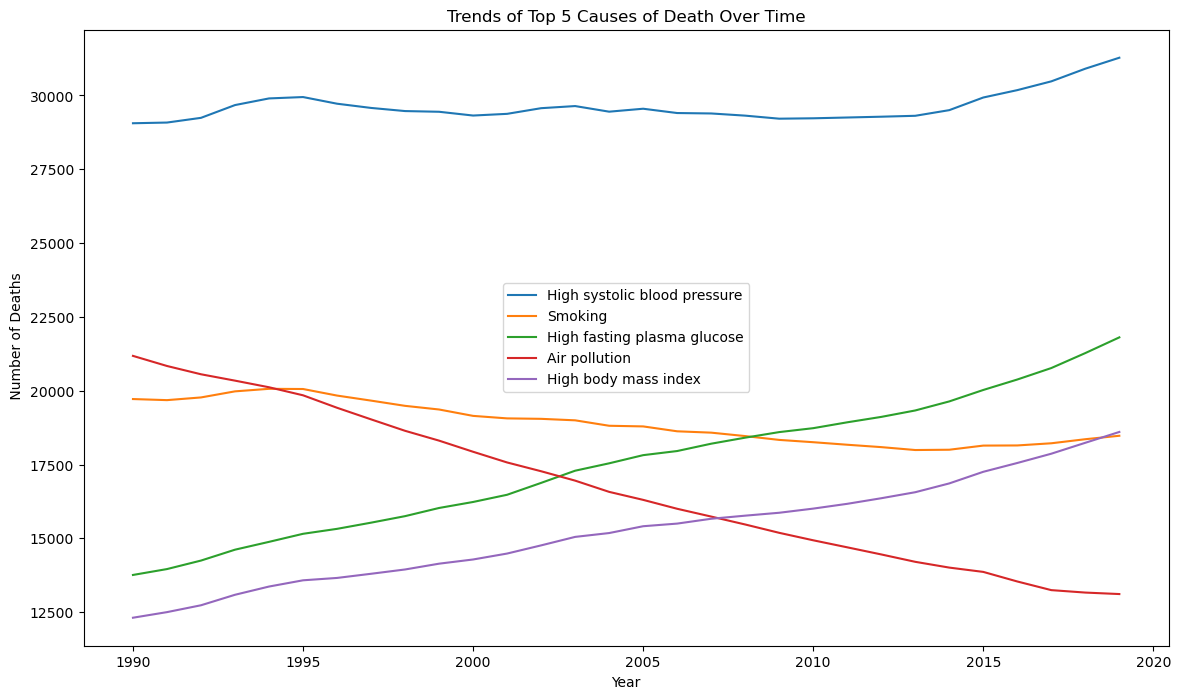

In [69]:
# Select the top 5 causes of death
top_5_causes = ['High systolic blood pressure', 'Smoking', 'High fasting plasma glucose', 'Air pollution', 'High body mass index']

# Aggregate data by year
yearly_data = df_cleaned.groupby('Year')[top_5_causes].sum()

# Plot the trends
plt.figure(figsize=(14, 8))
for cause in top_5_causes:
    sns.lineplot(data=yearly_data, x='Year', y=cause, label=cause)

plt.title('Trends of Top 5 Causes of Death Over Time')
plt.xlabel('Year')
plt.ylabel(' Number of Deaths')
plt.legend()
plt.show()

### Key question 2. What are the trend in top 5 mortality rates over years for the largest countries?

/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

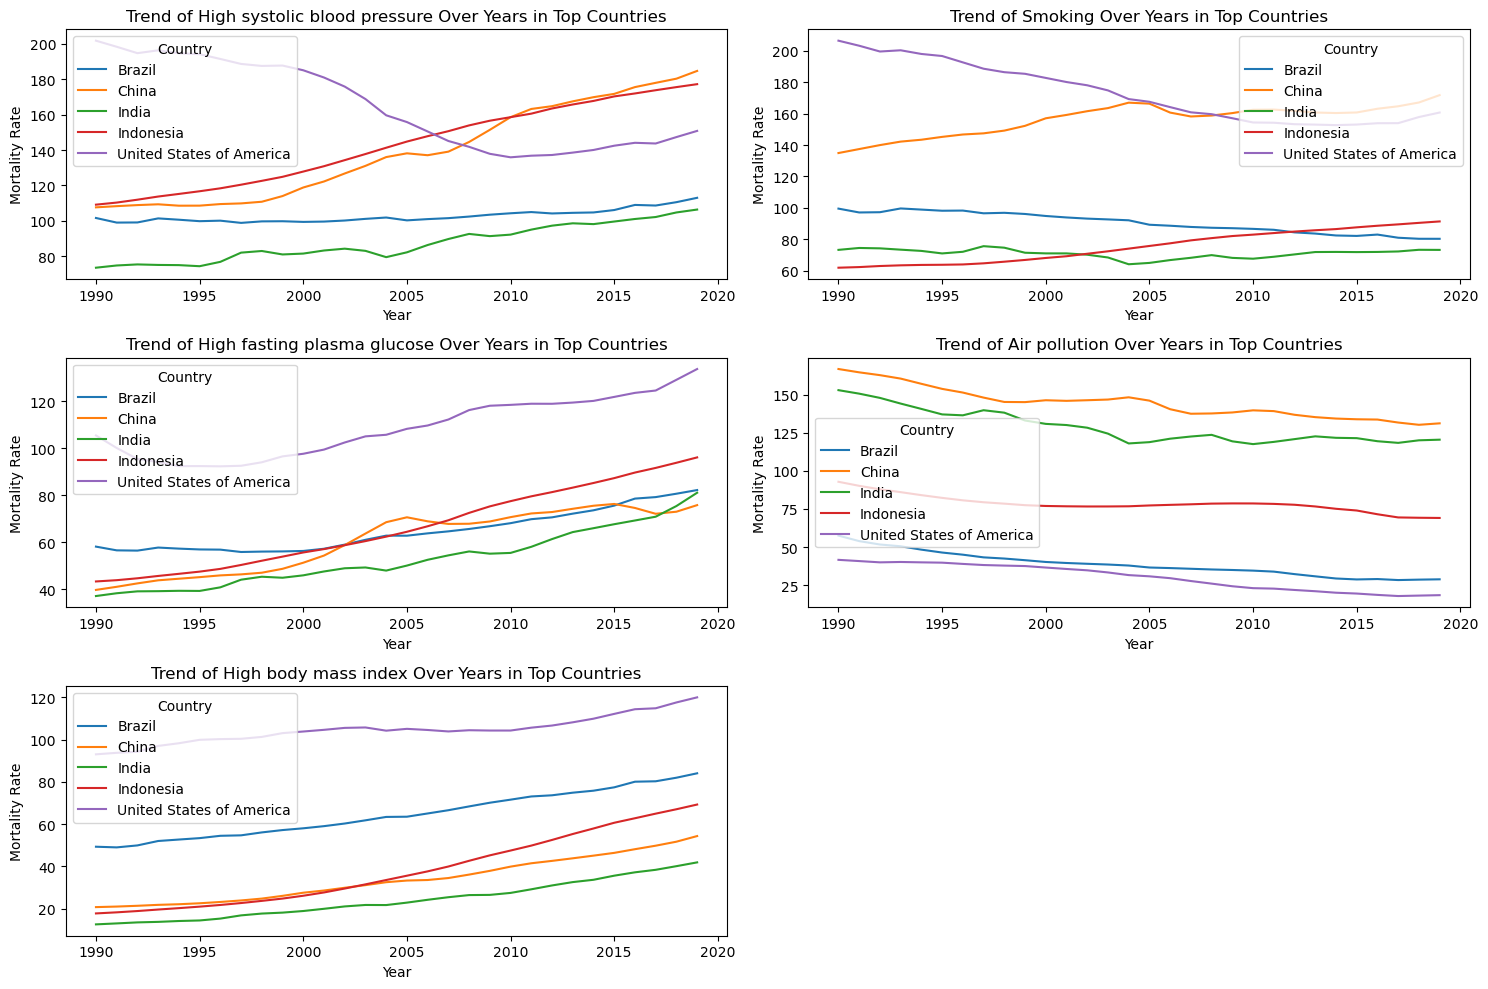

In [70]:


# Select top 5 causes of death
top_5_causes = top_causes.head(5).index.tolist()

# Find countries with the largest population
top_countries = df_cleaned.groupby('Country')['Population'].sum().nlargest(5).index.tolist()

# Filter the dataset for the top countries and causes
df_top_countries = df_cleaned[df_cleaned['Country'].isin(top_countries)]

# Create a plot for each of the top 5 causes of death over the years for the top countries
plt.figure(figsize=(15, 10))
for i, cause in enumerate(top_5_causes, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=df_top_countries, x='Year', y=cause, hue='Country')
    plt.title(f'Trend of {cause} Over Years in Top Countries')
    plt.ylabel('Mortality Rate')
    plt.xlabel('Year')

plt.tight_layout()
plt.show()


### Key question 3. How mortality rates differ across continens?

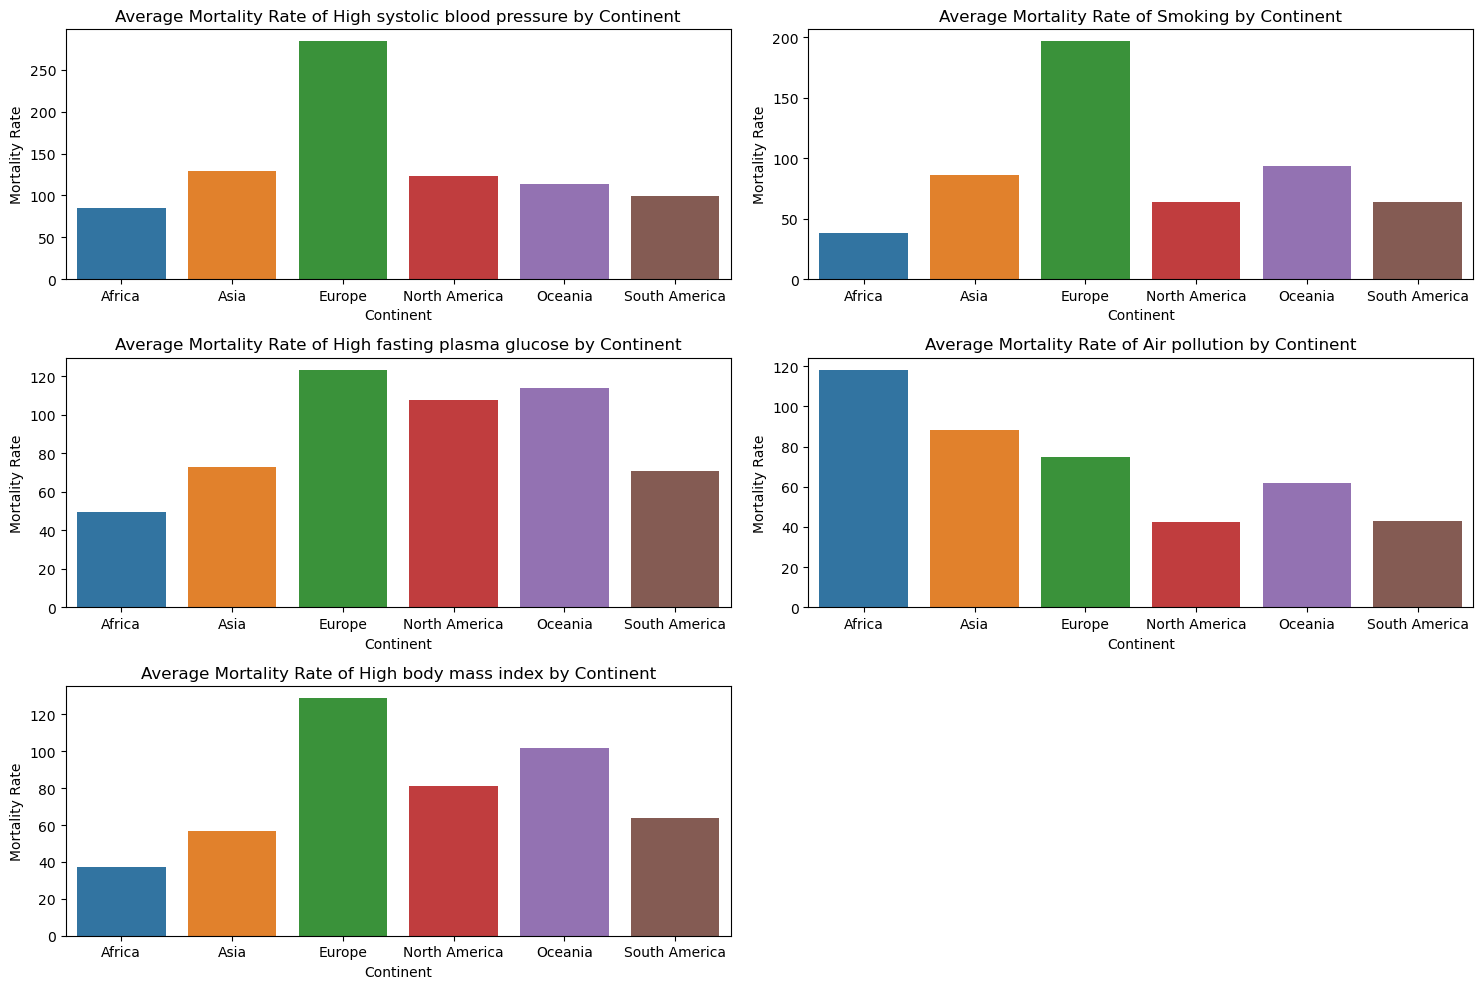

In [71]:
# Aggregate the data by continents and calculate the mean mortality rates for the top 5 causes
df_continent = df_cleaned.groupby('Continents')[top_5_causes].mean()

# Create a bar plot for each of the top 5 causes comparing continents
plt.figure(figsize=(15, 10))
for i, cause in enumerate(top_5_causes, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=df_continent.reset_index(), x='Continents', y=cause)
    plt.title(f'Average Mortality Rate of {cause} by Continent')
    plt.ylabel('Mortality Rate')
    plt.xlabel('Continent')

plt.tight_layout()
plt.show()


#### Key question 5. Mortality Rates for Highest 5 and Lowest 5 Countries

/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

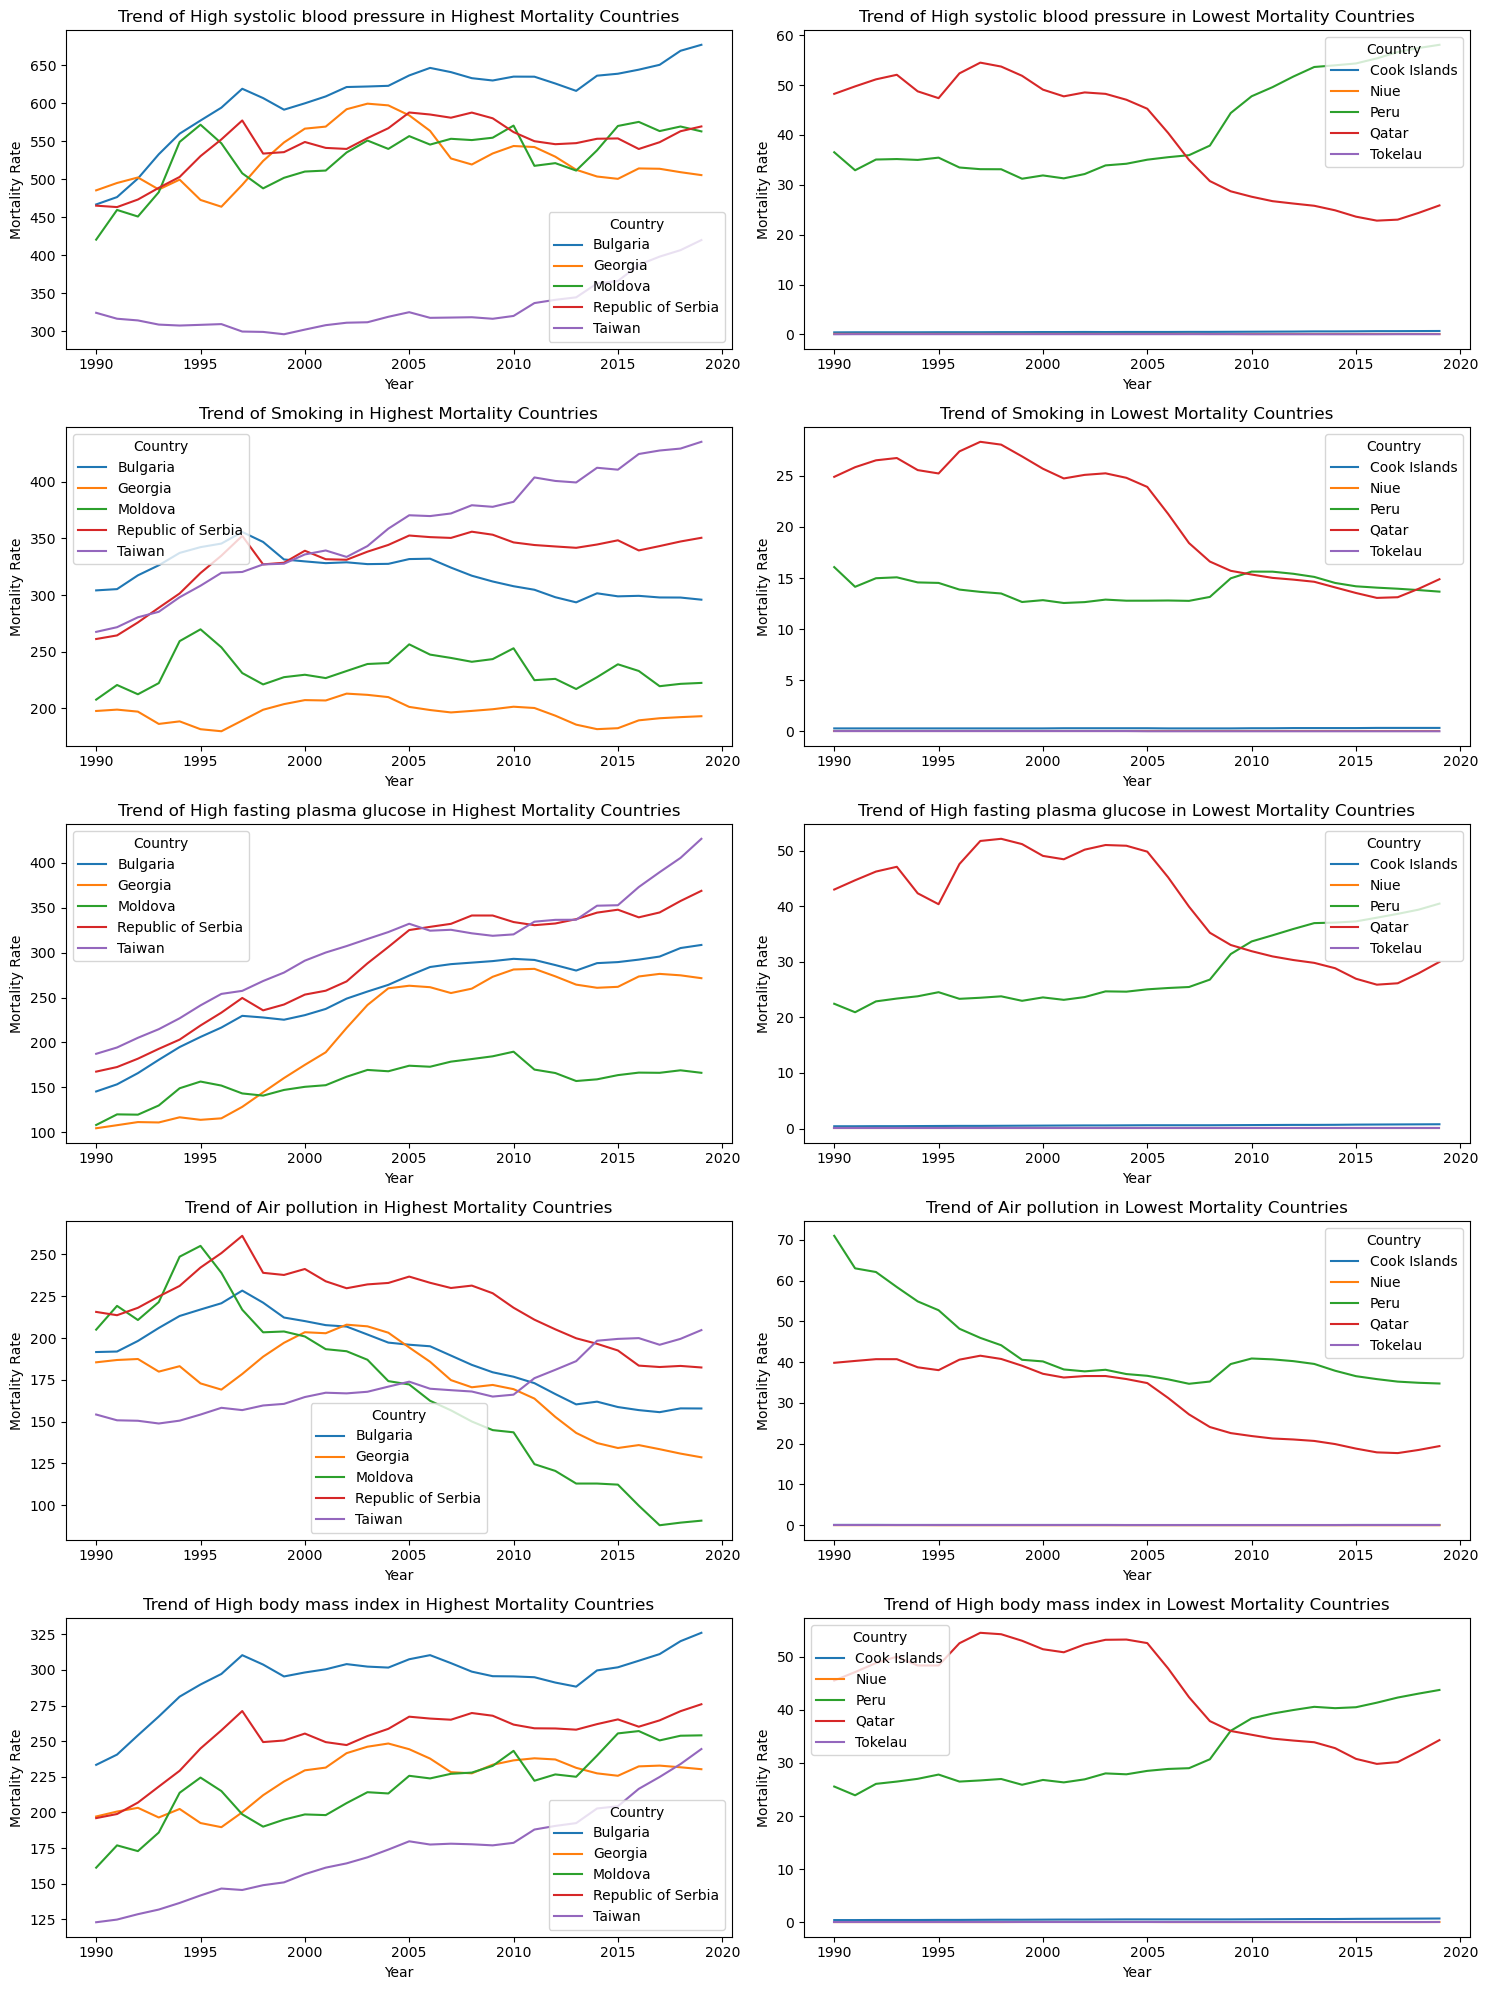

In [72]:

# Calculate the total mortality rate for each country by summing the top 5 causes
df_cleaned['Total_Mortality'] = df_cleaned[top_5_causes].sum(axis=1)

# Find the countries with the highest and lowest total mortality rates
highest_mortality_countries = df_cleaned.groupby('Country')['Total_Mortality'].sum().nlargest(5).index.tolist()
lowest_mortality_countries = df_cleaned.groupby('Country')['Total_Mortality'].sum().nsmallest(5).index.tolist()

# Filter the dataset for these countries
df_highest_mortality = df_cleaned[df_cleaned['Country'].isin(highest_mortality_countries)]
df_lowest_mortality = df_cleaned[df_cleaned['Country'].isin(lowest_mortality_countries)]

# Create a plot for each of the top 5 causes of death over the years for the highest and lowest mortality countries
plt.figure(figsize=(15, 20))

for i, cause in enumerate(top_5_causes, 1):
    plt.subplot(5, 2, 2*i-1)
    sns.lineplot(data=df_highest_mortality, x='Year', y=cause, hue='Country')
    plt.title(f'Trend of {cause} in Highest Mortality Countries')
    plt.ylabel('Mortality Rate')
    plt.xlabel('Year')
    
    plt.subplot(5, 2, 2*i)
    sns.lineplot(data=df_lowest_mortality, x='Year', y=cause, hue='Country')
    plt.title(f'Trend of {cause} in Lowest Mortality Countries')
    plt.ylabel('Mortality Rate')
    plt.xlabel('Year')

plt.tight_layout()
plt.show()

### Socio-economic factors and Life Expectancy

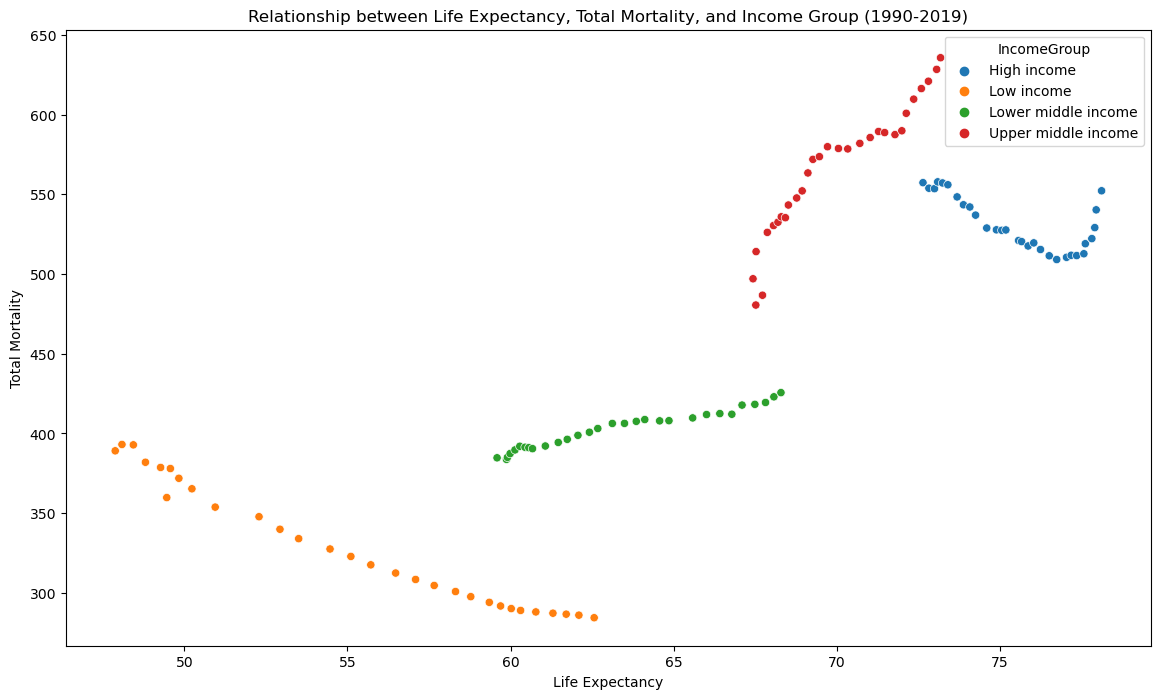

In [73]:
socioeconomic_factors = df_cleaned.groupby(['IncomeGroup', 'Year'])[['Total_Mortality', 'Life Expectancy']].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=socioeconomic_factors, x='Life Expectancy', y='Total_Mortality', hue='IncomeGroup')
plt.title('Relationship between Life Expectancy, Total Mortality, and Income Group (1990-2019)')
plt.xlabel('Life Expectancy')
plt.ylabel('Total Mortality')
plt.show()


### Exploring relationships

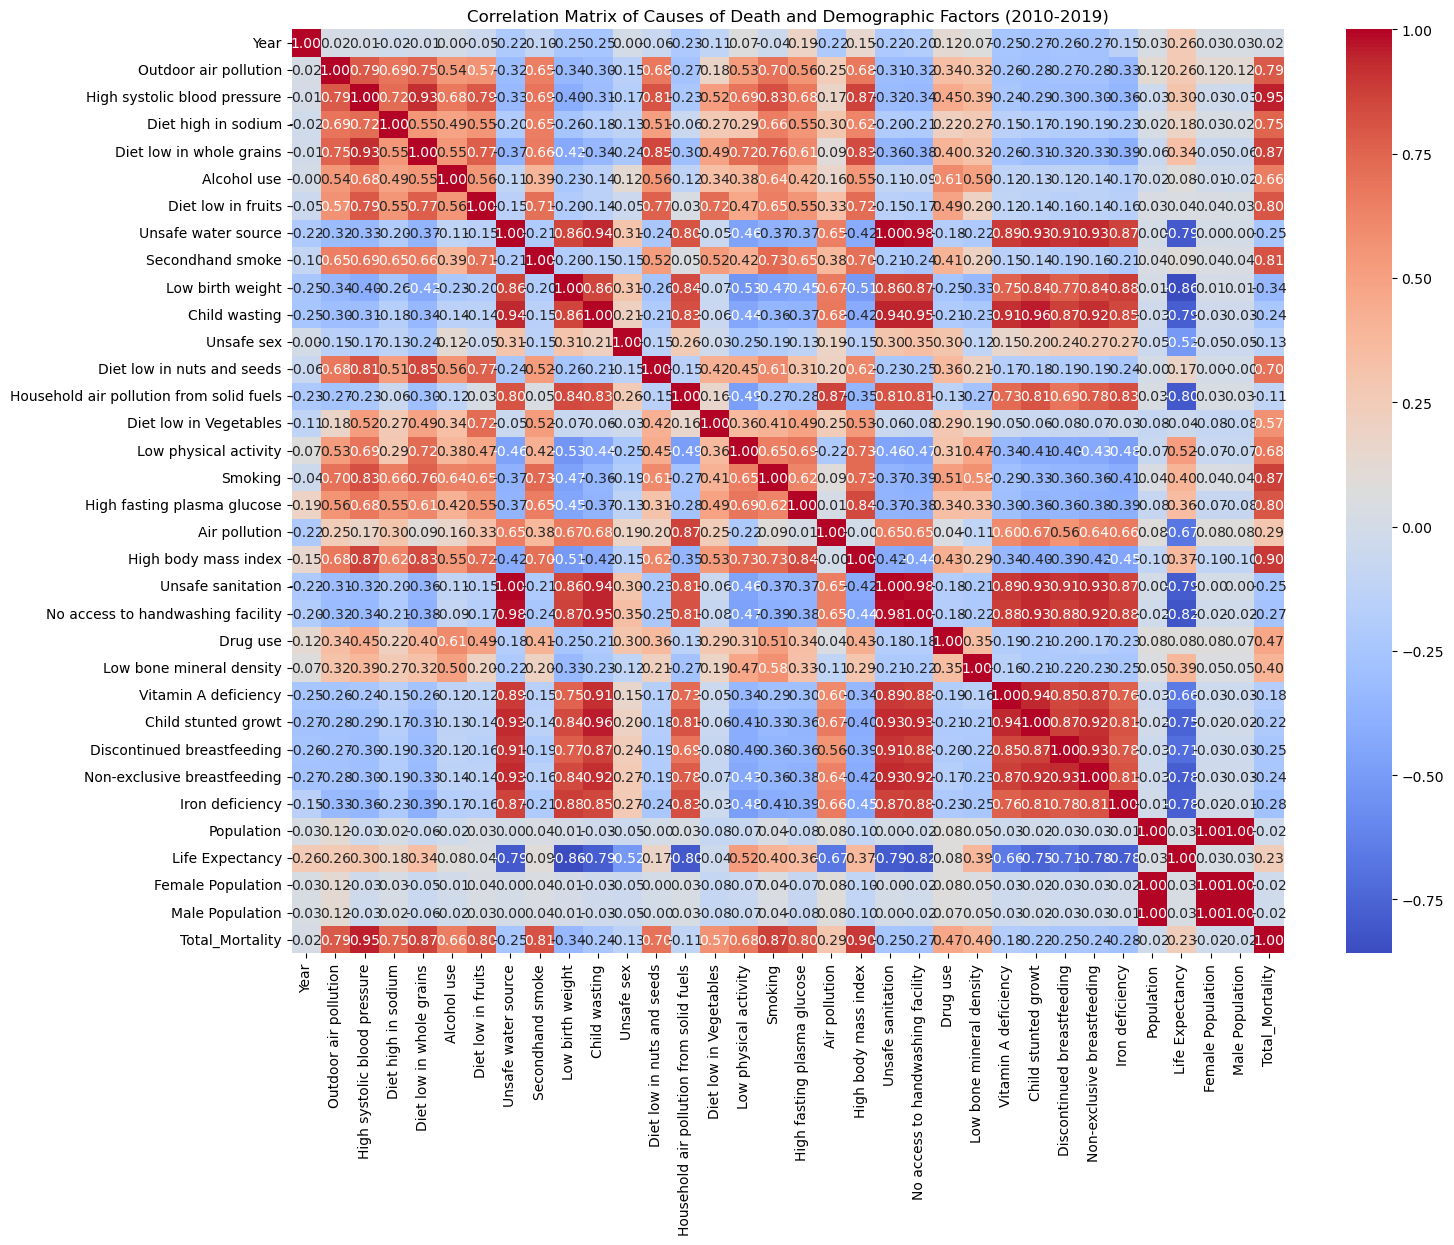

In [74]:
# Select only numeric columns
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Causes of Death and Demographic Factors (2010-2019)')
plt.show()


### Define risk factors to explore correlations with High systolic blood pressure for top causes of mortality 

High systolic blood pressure    1.000000
Smoking                         0.825405
Outdoor air pollution           0.788178
Diet high in sodium             0.723780
Low physical activity           0.692830
Alcohol use                     0.678898
Name: High systolic blood pressure, dtype: float64


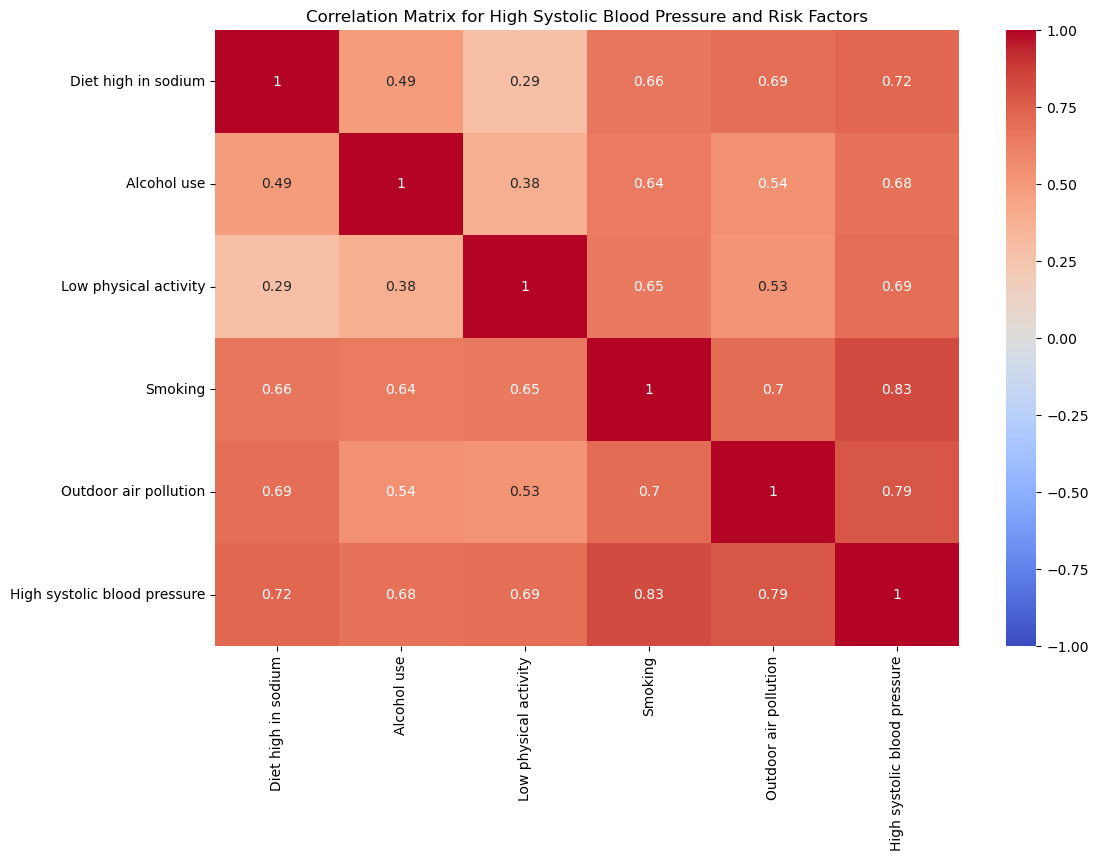

In [75]:

# Define the risk factors to be analyzed
risk_factors = [
    'Diet high in sodium', 'Alcohol use', 'Low physical activity', 'Smoking','Outdoor air pollution']


# Calculate the correlation matrix
correlation_matrix = df_cleaned[risk_factors + ['High systolic blood pressure']].corr()

# Display the correlation matrix
print(correlation_matrix['High systolic blood pressure'].sort_values(ascending=False))

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for High Systolic Blood Pressure and Risk Factors')
plt.show()


### Exploratory Analyses

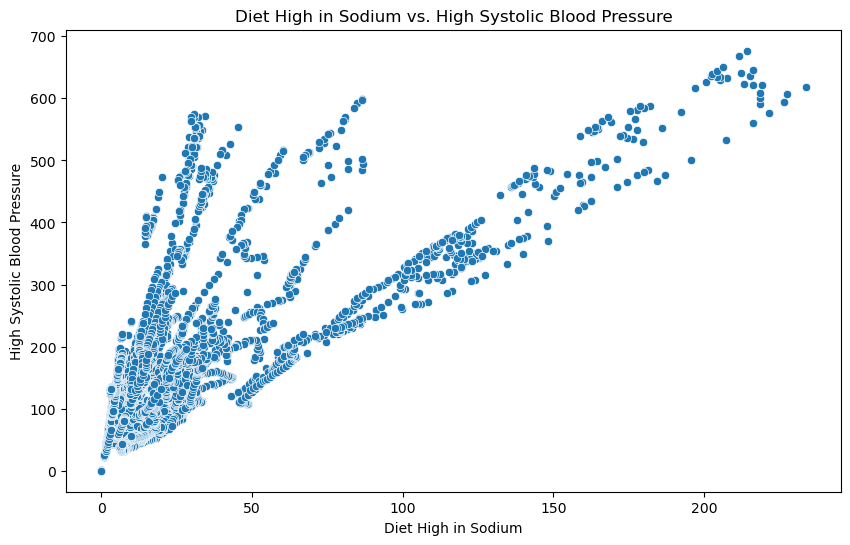

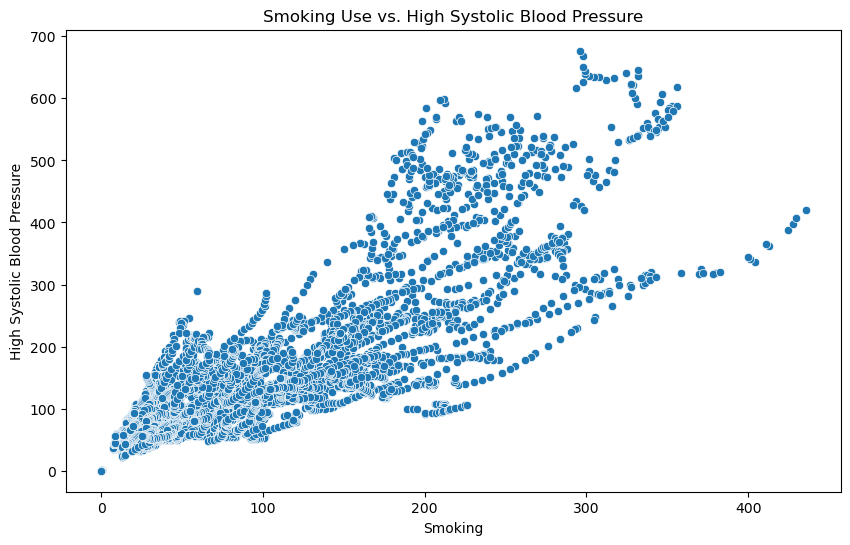

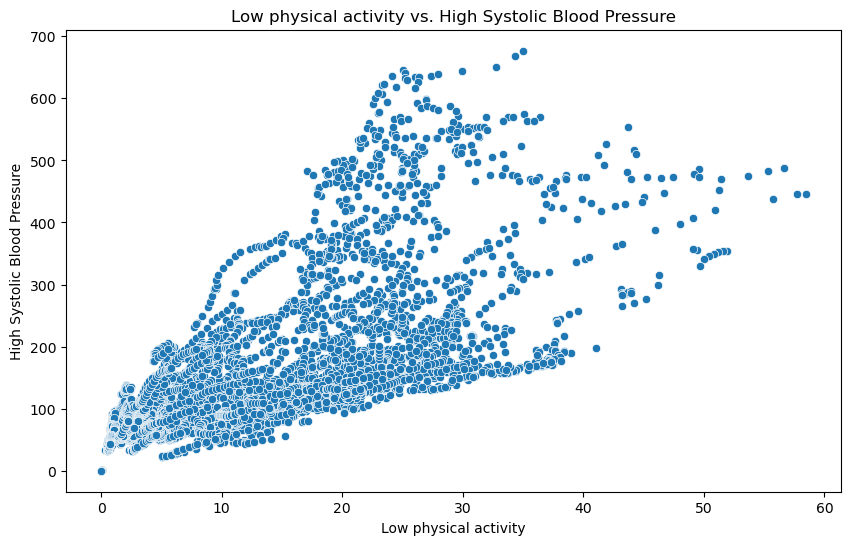

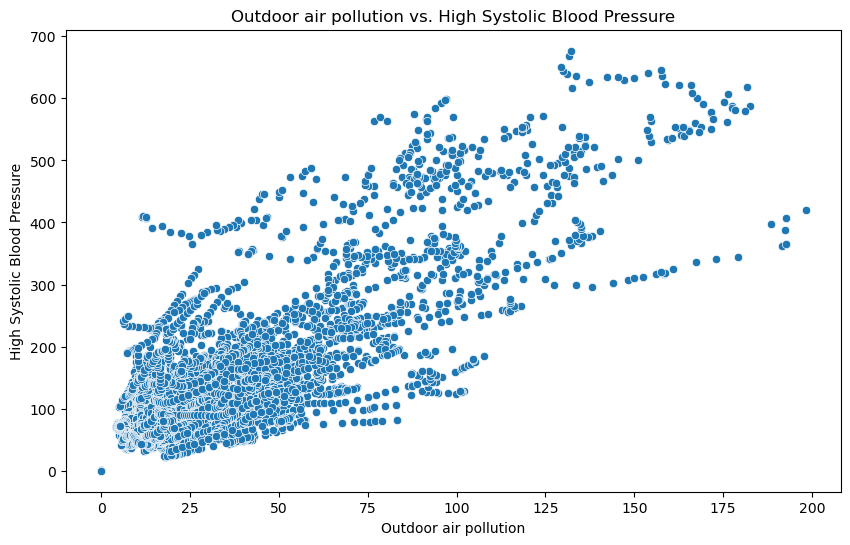

In [76]:
# Visualize the relationships between high systolic blood pressure and significant risk factors

# Scatter plot for 'Diet high in sodium' vs. 'High systolic blood pressure'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diet high in sodium', y='High systolic blood pressure', data=df_cleaned)
plt.title('Diet High in Sodium vs. High Systolic Blood Pressure')
plt.xlabel('Diet High in Sodium')
plt.ylabel('High Systolic Blood Pressure')
plt.show()

# Scatter plot for 'Alcohol use' vs. 'High systolic blood pressure'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Smoking', y='High systolic blood pressure', data=df_cleaned)
plt.title('Smoking Use vs. High Systolic Blood Pressure')
plt.xlabel('Smoking')
plt.ylabel('High Systolic Blood Pressure')
plt.show()

# Scatter plot for 'Physical inactivity' vs. 'High Systolic Blood Pressure'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Low physical activity', y='High systolic blood pressure', data=df_cleaned)
plt.title('Low physical activity vs. High Systolic Blood Pressure')
plt.xlabel('Low physical activity')
plt.ylabel('High Systolic Blood Pressure')
plt.show()


# Scatter plot for 'Physical inactivity' vs. 'High Systolic Blood Pressure'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outdoor air pollution', y='High systolic blood pressure', data=df_cleaned)
plt.title('Outdoor air pollution vs. High Systolic Blood Pressure')
plt.xlabel('Outdoor air pollution')
plt.ylabel('High Systolic Blood Pressure')
plt.show()


### Linear regression on data

In [77]:
# Define the risk factors and target variable
risk_factors2 = ['Diet high in sodium', 'Smoking', 'Low physical activity','Outdoor air pollution']
features = risk_factors2 + ['High systolic blood pressure']

X_train shape: (4896, 5)
X_test shape: (1224, 5)
Y_train shape: (4896,)
Y_test shape: (1224,)
Mean Squared Error: 1603.941698683325
R-squared: 0.8545559210242282


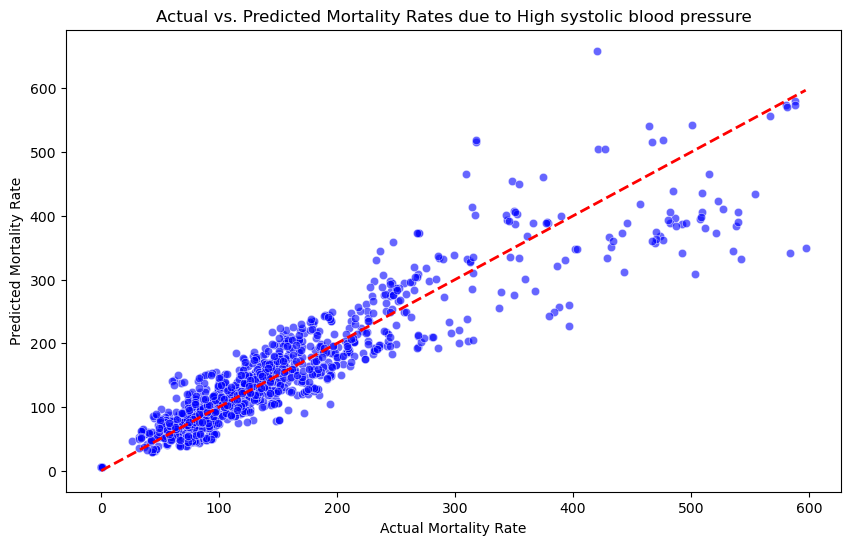

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Define the dependent variable (Y) and independent variables (X)
Y = df_cleaned['High systolic blood pressure']
X = df_cleaned[risk_factors]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, Y_train)

# Predict on the test data
Y_pred = linear_regressor.predict(X_test)

# Calculate mean squared error and R-squared value
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Mortality Rate')
plt.ylabel('Predicted Mortality Rate')
plt.title('Actual vs. Predicted Mortality Rates due to High systolic blood pressure')
plt.show()


In [79]:
 #Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

In [80]:
# Verify the results
print(comparison_df.head(30))
print(comparison_df.info())
comparison_df.shape

          Actual   Predicted
2094   82.585134   87.792170
1612  107.060358   81.352353
5858  147.415167  125.747786
4294   34.982737   62.152781
2571  130.659461  140.581813
3781  178.297015  177.771558
1005   90.701199   79.028305
4701  138.482844  156.147925
1817   97.600756  120.145285
4403  167.758488  201.507901
681    65.946881   80.785121
5087   67.455928  137.449888
604   170.262980  194.879212
3400  210.469022  188.736439
1608   86.954354   67.201038
167    56.944906   67.080140
3021  126.958296  150.418763
2986  148.330545  174.170675
1744   88.176255  100.256811
5446   75.039741  120.663716
811   476.497350  519.536438
5164  101.589274   96.573972
4762   78.565178  104.108403
5339  127.215050  141.167913
1730   46.595598   53.159528
1699   96.976156   80.345583
1357  139.314605  183.887867
3680  155.204427  148.749041
319   211.414565  234.213057
4015  389.860817  399.643924
<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 2094 to 5554
Data columns (total 2 columns

(1224, 2)

### Clustering Analysis

In [81]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [82]:
df_cleaned.info

<bound method DataFrame.info of           Country Country Code  Year  Outdoor air pollution  \
0     Afghanistan          AFG  1990              29.631234   
1     Afghanistan          AFG  1991              29.985574   
2     Afghanistan          AFG  1992              28.156905   
3     Afghanistan          AFG  1993              25.871623   
4     Afghanistan          AFG  1994              24.508987   
...           ...          ...   ...                    ...   
6115     Zimbabwe          ZWE  2015              20.028348   
6116     Zimbabwe          ZWE  2016              19.242074   
6117     Zimbabwe          ZWE  2017              18.303718   
6118     Zimbabwe          ZWE  2018              17.731646   
6119     Zimbabwe          ZWE  2019              17.454044   

      High systolic blood pressure  Diet high in sodium  \
0                       239.677316             9.771107   
1                       240.778017             9.818368   
2                       218.197356

In [83]:
# drop non-numeric columns from the dataset to perform K-means algorithm

df_cleaned2=df_cleaned.drop(columns=['Country','Continents','Country Code','IncomeGroup','Decade'])

In [84]:
df_cleaned2.head()

Year  Outdoor air pollution  High systolic blood pressure  \
0  1990              29.631234                    239.677316   
1  1991              29.985574                    240.778017   
2  1992              28.156905                    218.197356   
3  1993              25.871623                    192.526864   
4  1994              24.508987                    178.951840   

   Diet high in sodium  Diet low in whole grains  Alcohol use  \
0             9.771107                 66.172370     3.328722   
1             9.818368                 66.532237     3.387569   
2             8.915662                 60.518686     3.118408   
3             7.876456                 53.549904     2.777825   
4             7.337168                 49.807335     2.581596   

   Diet low in fruits  Unsafe water source  Secondhand smoke  \
0           29.780839            34.614966         44.825539   
1           30.227543            40.101750         45.797334   
2           27.791985            44.420732         43.782122   
3           24.850469            51.071998         40.946146   
4           23.357298            46.533431         39.144502   

   Low birth weight  ...  Vitamin A deficiency  Child stunted growt  \
0        150.867768  ...             18.850289            71.866728   
1        166.809878  ...             19.134184            73.391135   
2        175.825153  ...             17.416642            71.059901   
3        169.918650  ...             16.538415            70.516775   
4        160.887137  ...             17.242991            71.372397   

   Discontinued breastfeeding  Non-exclusive breastfeeding  Iron deficiency  \
0                    1.000487                    20.720358         5.273593   
1                    1.126088                    23.275581         5.686277   
2                    1.244046                    25.320481         5.805547   
3                    1.456752                    26.607140         5.519946   
4                    1.319914                    24.800145         5.253774   

   Population  Life Expectancy  Female Population  Male Population  \
0  10694796.0           45.967          5346409.0        5348387.0   
1  10745167.0           46.663          5372208.0        5372959.0   
2  12057433.0           47.596          6028939.0        6028494.0   
3  14003760.0           51.466          7000119.0        7003641.0   
4  15455555.0           51.495          7722096.0        7733458.0   

   Total_Mortality  
0       832.227188  
1       844.416843  
2       784.885141  
3       709.830788  
4       666.789384  

[5 rows x 34 columns]

### The elbow technique

In [85]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [86]:


score = [kmeans[i].fit(df_cleaned2).score(df_cleaned2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

[-1.4297663411871618e+20,
 -1.5973783543185009e+19,
 -6.264234134984335e+18,
 -3.9112862933621576e+18,
 -2.5629940382193956e+18,
 -1.6908047996469176e+18,
 -1.2614605055885425e+18,
 -9.405306535960806e+17,
 -7.178676641768369e+17]

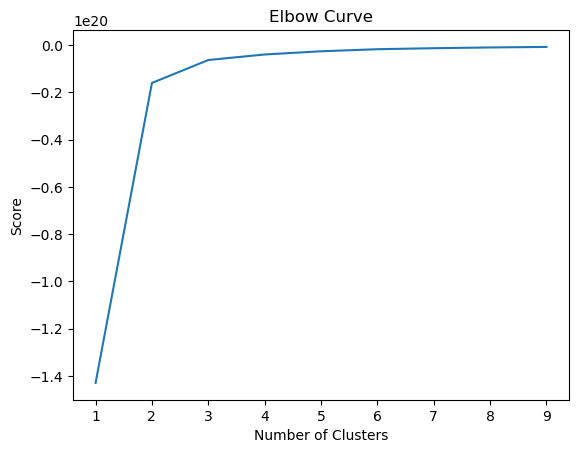

In [87]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### K-mean clustering 

In [88]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [89]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned2)

/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [90]:
df_cleaned2['clusters'] = kmeans.fit_predict(df_cleaned2)

/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
df_cleaned2.head()

Year  Outdoor air pollution  High systolic blood pressure  \
0  1990              29.631234                    239.677316   
1  1991              29.985574                    240.778017   
2  1992              28.156905                    218.197356   
3  1993              25.871623                    192.526864   
4  1994              24.508987                    178.951840   

   Diet high in sodium  Diet low in whole grains  Alcohol use  \
0             9.771107                 66.172370     3.328722   
1             9.818368                 66.532237     3.387569   
2             8.915662                 60.518686     3.118408   
3             7.876456                 53.549904     2.777825   
4             7.337168                 49.807335     2.581596   

   Diet low in fruits  Unsafe water source  Secondhand smoke  \
0           29.780839            34.614966         44.825539   
1           30.227543            40.101750         45.797334   
2           27.791985            44.420732         43.782122   
3           24.850469            51.071998         40.946146   
4           23.357298            46.533431         39.144502   

   Low birth weight  ...  Child stunted growt  Discontinued breastfeeding  \
0        150.867768  ...            71.866728                    1.000487   
1        166.809878  ...            73.391135                    1.126088   
2        175.825153  ...            71.059901                    1.244046   
3        169.918650  ...            70.516775                    1.456752   
4        160.887137  ...            71.372397                    1.319914   

   Non-exclusive breastfeeding  Iron deficiency  Population  Life Expectancy  \
0                    20.720358         5.273593  10694796.0           45.967   
1                    23.275581         5.686277  10745167.0           46.663   
2                    25.320481         5.805547  12057433.0           47.596   
3                    26.607140         5.519946  14003760.0           51.466   
4                    24.800145         5.253774  15455555.0           51.495   

   Female Population  Male Population  Total_Mortality  clusters  
0          5346409.0        5348387.0       832.227188         0  
1          5372208.0        5372959.0       844.416843         0  
2          6028939.0        6028494.0       784.885141         0  
3          7000119.0        7003641.0       709.830788         0  
4          7722096.0        7733458.0       666.789384         0  

[5 rows x 35 columns]

In [92]:
df_cleaned2['clusters'].value_counts()

clusters
0    5743
2     317
1      60
Name: count, dtype: int64

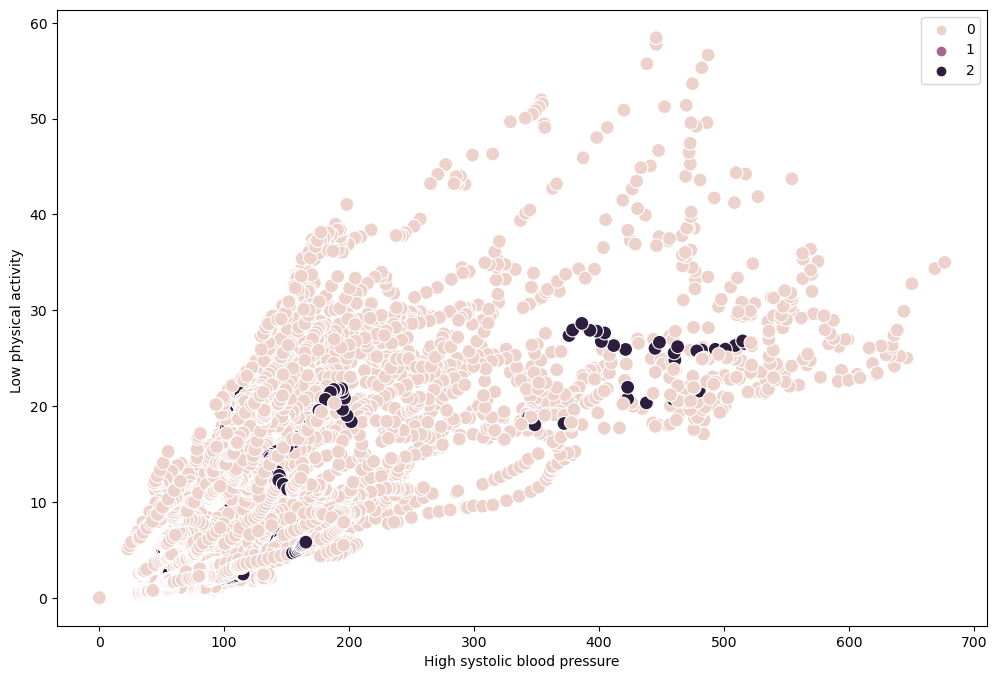

In [93]:
# Plot the clusters for the "High systolic pressure"  and "Diet high in sodium" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned2['High systolic blood pressure'], y=df_cleaned2['Low physical activity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('High systolic blood pressure') # Label x-axis.
plt.ylabel('Low physical activity ') # Label y-axis.
plt.show()

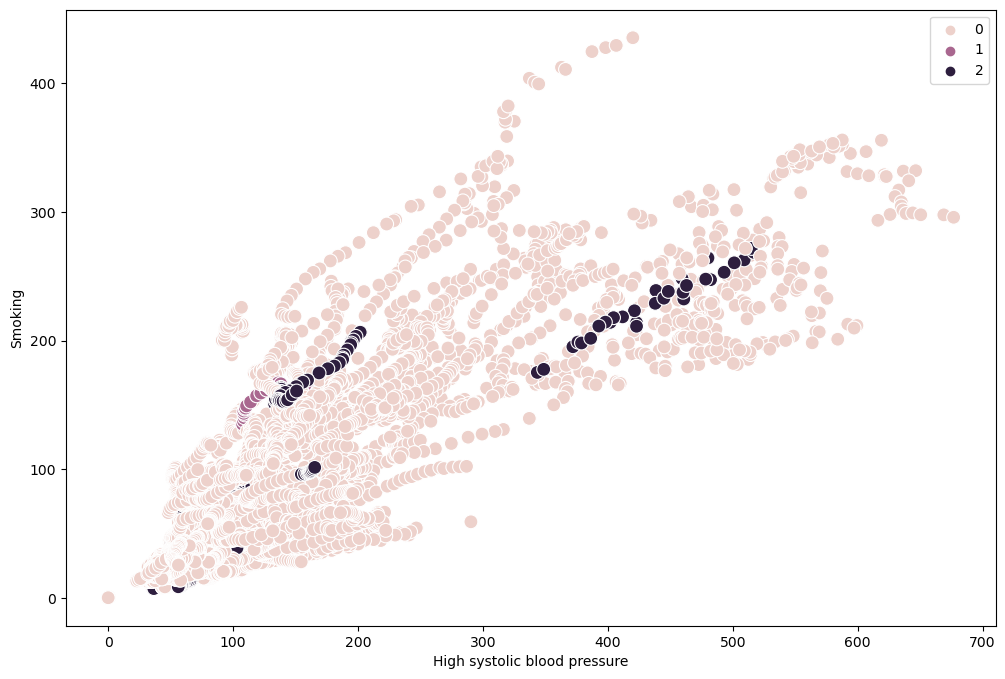

In [94]:
# Plot the clusters for the "High systolic pressure"  and "High body mass index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned2['High systolic blood pressure'], y=df_cleaned2['Smoking'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('High systolic blood pressure') # Label x-axis.
plt.ylabel('Smoking') # Label y-axis.
plt.show()

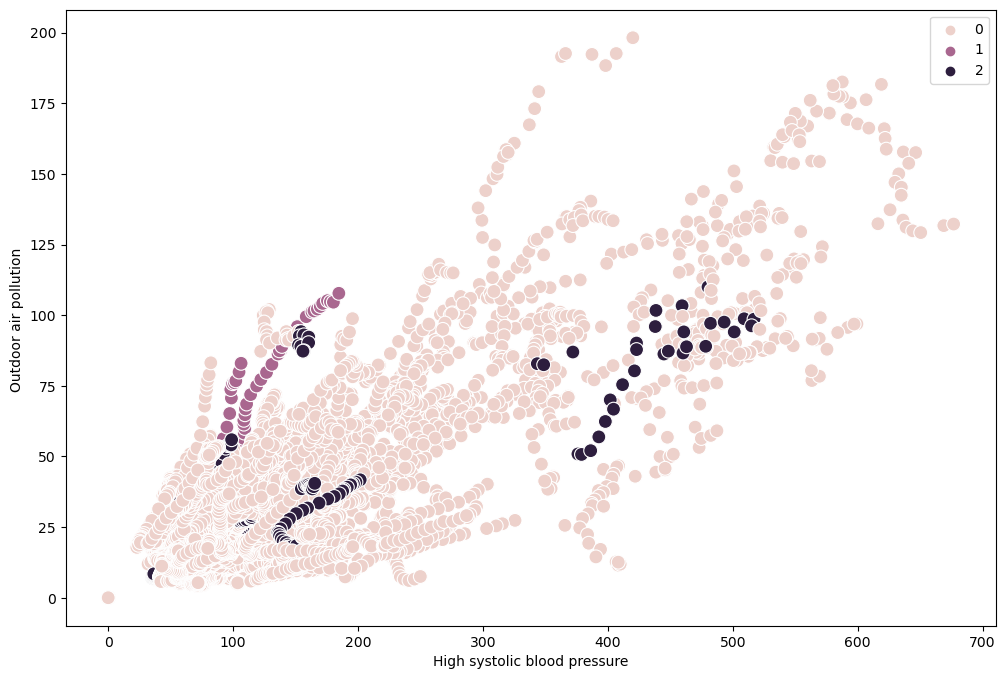

In [95]:
# Plot the clusters for the "High systolic pressure"  and "High body mass index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned2['High systolic blood pressure'], y=df_cleaned2['Outdoor air pollution'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('High systolic blood pressure') # Label x-axis.
plt.ylabel('Outdoor air pollution ') # Label y-axis.
plt.show()

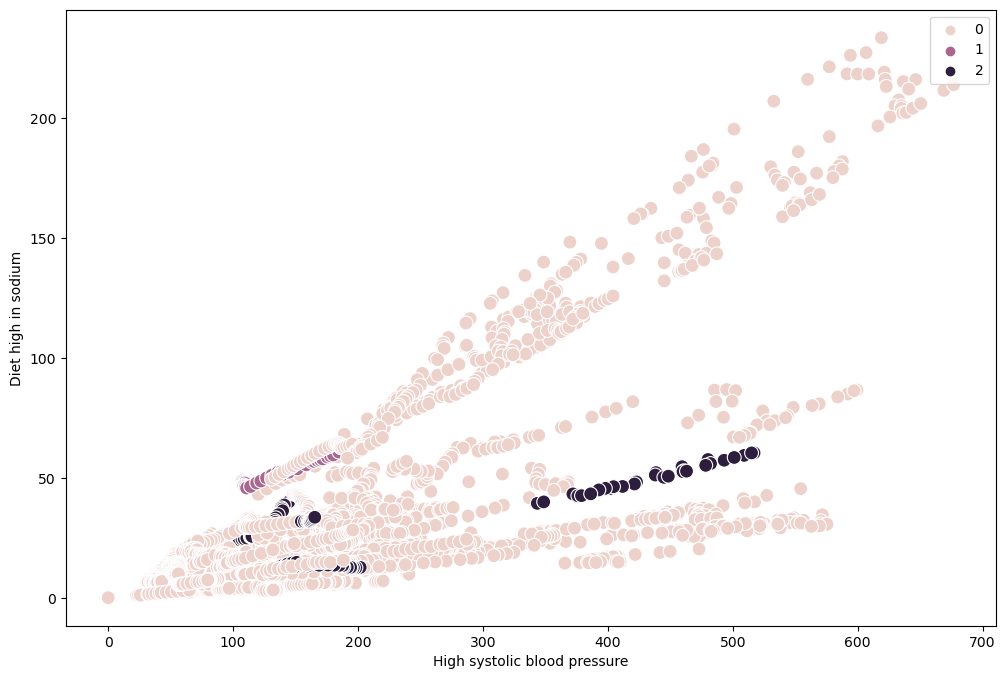

In [96]:
# Plot the clusters for the "High systolic pressure"  and "High body mass index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned2['High systolic blood pressure'], y=df_cleaned2['Diet high in sodium'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('High systolic blood pressure') # Label x-axis.
plt.ylabel('Diet high in sodium') # Label y-axis.
plt.show()

In [97]:
df_cleaned2.groupby('clusters').agg({'High systolic blood pressure':['mean', 'median','std'], 
                         'Diet high in sodium':['mean', 'median','std'], 
                         'Smoking':['mean', 'median','std'],
                                     'Outdoor air pollution':['mean','median','std'],
                                     'Low physical activity':['mean','median','std']
                          })

High systolic blood pressure                          \
                                 mean      median         std   
clusters                                                        
0                          145.922396  115.593558  109.428221   
1                          112.951028  107.041734   32.707201   
2                          138.343012  104.937166  104.859677   

         Diet high in sodium                           Smoking              \
                        mean     median        std        mean      median   
clusters                                                                     
0                  21.096369  12.046509  29.652701   92.299967   65.489488   
1                  31.321881  29.210471  21.244001  113.611409  105.285316   
2                  18.744548  13.276073  14.448663   95.983177   83.016702   

                    Outdoor air pollution                        \
                std                  mean     median        std   
clusters                                                          
0         75.314733             36.020174  27.435390  29.778296   
1         43.585934             68.190265  66.019327  22.755932   
2         64.490740             36.217404  28.873297  21.129474   

         Low physical activity                       
                          mean    median        std  
clusters                                             
0                    12.266602  9.941255  10.030637  
1                     6.121034  5.688808   1.820318  
2                    10.304556  6.790282   7.556145

In [98]:

df_cleaned2.loc[df_cleaned2['clusters'] == 2, 'cluster'] = 'purple'
df_cleaned2.loc[df_cleaned2['clusters'] == 1, 'cluster'] = 'lilac'
df_cleaned2.loc[df_cleaned2['clusters'] == 0, 'cluster'] = 'pink'


In [99]:
from sklearn.model_selection import train_test_split

# Define the independent variables and the dependent variable
X_life_expectancy = df_cleaned[['Alcohol use', 'Smoking', 'Low physical activity']]
y_life_expectancy = df_cleaned['Life Expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_life_expectancy, y_life_expectancy, test_size=0.3, random_state=42)


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


(57.0682696743475, 0.3167114317527362)

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(11.332272537356653, 0.8643166803335054)

In [102]:
# Coefficients of the Linear Regression model
linear_coefficients = linear_regressor.coef_
linear_intercept = linear_regressor.intercept_

linear_coefficients, linear_intercept


(array([-0.09126948,  0.03929432,  0.40884085]), 62.73900042148079)

In [103]:
# Insights for Linear Regression
linear_insights = pd.DataFrame({
    'Feature': ['alcohol_use', 'smoking', 'low_physical_activity'],
    'Coefficient': linear_coefficients
})

linear_insights


Feature  Coefficient
0            alcohol_use    -0.091269
1                smoking     0.039294
2  low_physical_activity     0.408841

Insights:

Alcohol Use: For each unit increase in alcohol use, life expectancy decreases by approximately 0.091 years, holding other factors constant.

Smoking: For each unit increase in smoking, life expectancy increases by approximately 0.039 years, holding other factors constant

Low Physical Activity: For each unit increase in low physical activity, life expectancy increases by approximately 0.409 years, holding other factors constant.

In [104]:
# Feature importances of the RandomForestRegressor model
rf_feature_importances = rf_regressor.feature_importances_

rf_insights = pd.DataFrame({
    'Feature': ['alcohol_use', 'smoking', 'low_physical_activity'],
    'Importance': rf_feature_importances
})

rf_insights


Feature  Importance
0            alcohol_use    0.234179
1                smoking    0.235988
2  low_physical_activity    0.529833

Low Physical Activity has the highest importance, indicating it is the most significant factor in predicting life expectancy among the three lifestyle factors analyzed.

Smoking and Alcohol Use have relatively similar importance but are less significant compared to low physical activity.

The feature importance values suggest that low physical activity plays a crucial role in determining life expectancy, followed by smoking and alcohol use.

Conclusion

The RandomForestRegressor model provides better predictive power and highlights low physical activity as a major factor affecting life expectancy. The Linear Regression model, while simpler, shows some potentially confounding relationships that might require further exploration with more complex models or additional data.



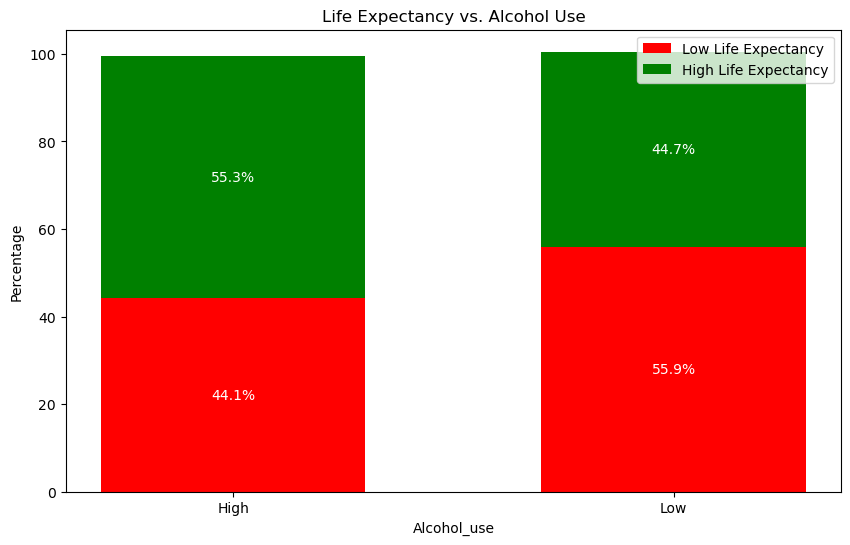

In [105]:
import matplotlib.pyplot as plt

# Step 1: Categorize Life Expectancy
median_life_expectancy = df_cleaned['Life Expectancy'].median()
df_cleaned['life_expectancy_category'] = df_cleaned['Life Expectancy'].apply(lambda x: 'High' if x >= median_life_expectancy else 'Low')

# Step 2: Binarize Lifestyle Factors
df_cleaned['alcohol_use_category'] = df_cleaned['Alcohol use'].apply(lambda x: 'High' if x >= df_cleaned['Alcohol use'].median() else 'Low')

# Step 3: Create Stacked Bar Plots
def create_stacked_bar_plot(factor_category, title):
    high_life_expectancy = df_cleaned[df_cleaned['life_expectancy_category'] == 'High'][factor_category].value_counts(normalize=True) * 100
    low_life_expectancy = df_cleaned[df_cleaned['life_expectancy_category'] == 'Low'][factor_category].value_counts(normalize=True) * 100

    # Ensure both high and low have the same categories
    all_labels = high_life_expectancy.index.union(low_life_expectancy.index)
    high_life_expectancy = high_life_expectancy.reindex(all_labels, fill_value=0)
    low_life_expectancy = low_life_expectancy.reindex(all_labels, fill_value=0)

    labels = all_labels
    high_values = high_life_expectancy.values
    low_values = low_life_expectancy.values

    x = range(len(labels))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, low_values, width=0.6, label='Low Life Expectancy', color='r')
    ax.bar(x, high_values, width=0.6, bottom=low_values, label='High Life Expectancy', color='g')

    for i in x:
        ax.text(i, low_values[i] + high_values[i] / 2, f'{high_values[i]:.1f}%', ha='center', va='center', color='white')
        ax.text(i, low_values[i] / 2, f'{low_values[i]:.1f}%', ha='center', va='center', color='white')

    ax.set_xlabel(factor_category.replace('_category', '').capitalize())
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Create stacked bar plots for each binarized lifestyle factor
binary_factors = {
    'alcohol_use_category': 'Life Expectancy vs. Alcohol Use'}
    

for factor, title in binary_factors.items():
    create_stacked_bar_plot(factor, title)




Alcohol Use:

The plot shows that individuals with high alcohol use have a higher proportion of high life expectancy (55.3%) compared to low alcohol use (44.7%).

Conversely, the proportion of low life expectancy is higher among those with low alcohol use (55.9%) compared to high alcohol use (44.1%).

Conclusion

Alcohol Use: Shows a minor impact, with slight differences between high and low life expectancy groups.

In [106]:
df_cleaned.info

<bound method DataFrame.info of           Country Country Code  Year  Outdoor air pollution  \
0     Afghanistan          AFG  1990              29.631234   
1     Afghanistan          AFG  1991              29.985574   
2     Afghanistan          AFG  1992              28.156905   
3     Afghanistan          AFG  1993              25.871623   
4     Afghanistan          AFG  1994              24.508987   
...           ...          ...   ...                    ...   
6115     Zimbabwe          ZWE  2015              20.028348   
6116     Zimbabwe          ZWE  2016              19.242074   
6117     Zimbabwe          ZWE  2017              18.303718   
6118     Zimbabwe          ZWE  2018              17.731646   
6119     Zimbabwe          ZWE  2019              17.454044   

      High systolic blood pressure  Diet high in sodium  \
0                       239.677316             9.771107   
1                       240.778017             9.818368   
2                       218.197356

In [107]:
# Save the data to a CSV file
df_cleaned.to_csv(r'/Users/milivanili/Desktop/CF Document 6/01 Data/Prepared Data/df_cleaned_cause2.csv')
df_cleaned2.to_csv(r'/Users/milivanili/Desktop/CF Document 6/01 Data/Prepared Data/df_cleaned_claster.csv')